<a href="https://www.kaggle.com/code/janstylewis7/notebookeb3339514f?scriptVersionId=229189877" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/star-dataset/6 class csv.csv


In [2]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [3]:
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import Dataset,DataLoader
from torchsummary import summary
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [4]:
df = pd.read_csv("/kaggle/input/star-dataset/6 class csv.csv")

In [5]:
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [6]:
cols = list(df.columns)
cols

['Temperature (K)',
 'Luminosity(L/Lo)',
 'Radius(R/Ro)',
 'Absolute magnitude(Mv)',
 'Star type',
 'Star color',
 'Spectral Class']

In [7]:
cols.append(cols.pop(4))
cols

['Temperature (K)',
 'Luminosity(L/Lo)',
 'Radius(R/Ro)',
 'Absolute magnitude(Mv)',
 'Star color',
 'Spectral Class',
 'Star type']

In [8]:
df = df[cols]

In [9]:
df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star color,Spectral Class,Star type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O,5
236,30839,834042.000000,1194.0000,-10.63,Blue,O,5
237,8829,537493.000000,1423.0000,-10.73,White,A,5
238,9235,404940.000000,1112.0000,-11.23,White,A,5


In [10]:
df.dropna(inplace=True)
print("output possibilities:", df["Star type"].unique())
print("data shape:", df.shape )
df.head()

output possibilities: [0 1 2 3 4 5]
data shape: (240, 7)


,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star color,Spectral Class,Star type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [11]:
original = df.copy()



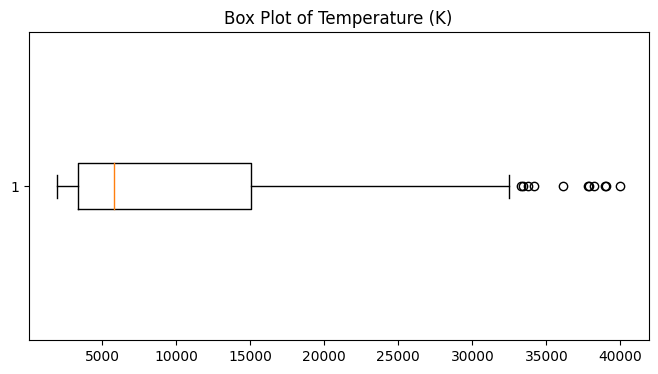

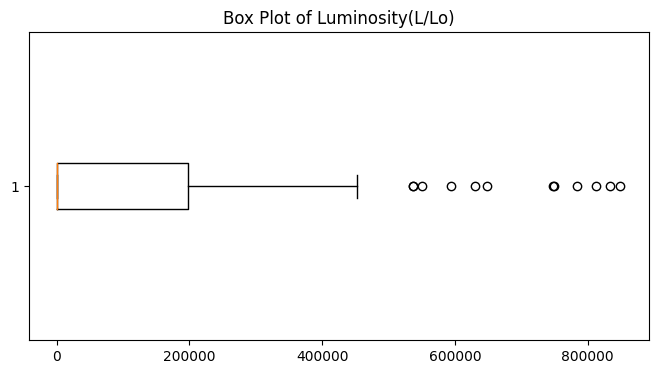

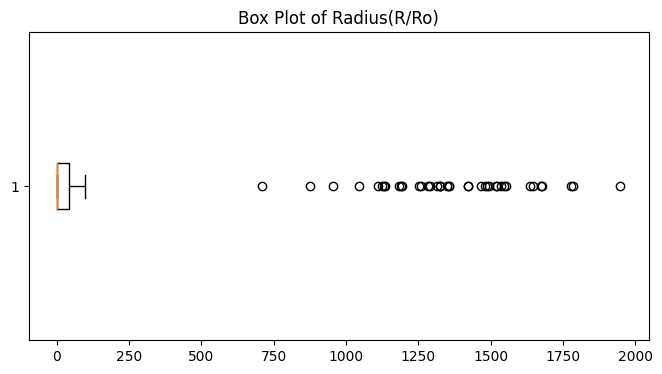

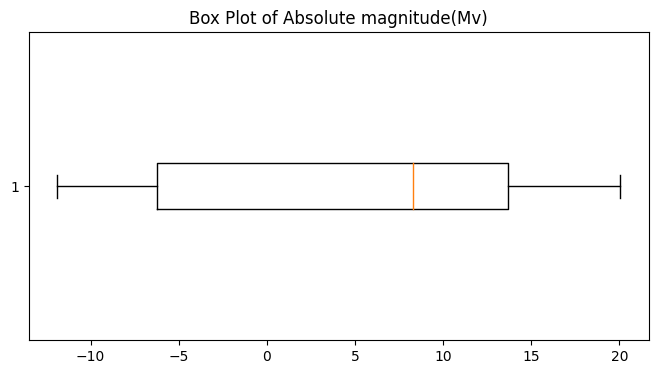

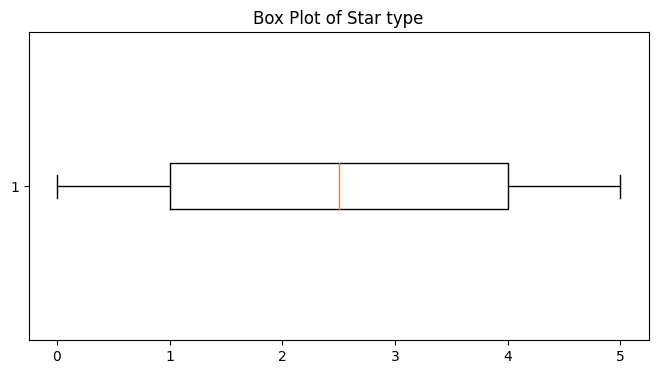

In [12]:
for col in df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(8,4))
    plt.boxplot(df[col], vert=False)
    plt.title(f'Box Plot of {col}')
    plt.show()


In [13]:
cols.pop()
cols

['Temperature (K)',
 'Luminosity(L/Lo)',
 'Radius(R/Ro)',
 'Absolute magnitude(Mv)',
 'Star color',
 'Spectral Class']

In [14]:
df['Star color'].unique()

array(['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
       'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish',
       'yellow-white', 'Orange', 'White-Yellow', 'white', 'Blue ',
       'yellowish', 'Yellowish', 'Orange-Red', 'Blue white ',
       'Blue-White'], dtype=object)

In [15]:
df['Star color'] = df['Star color'].str.lower().str.strip()
unique_colors = df['Star color'].unique()
print(len(unique_colors), unique_colors)

13 ['red' 'blue white' 'white' 'yellowish white' 'pale yellow orange' 'blue'
 'blue-white' 'whitish' 'yellow-white' 'orange' 'white-yellow' 'yellowish'
 'orange-red']


In [16]:
color_mapping = {
    "blue white" : "blue-white"
}
df['Star color']= df['Star color'].replace(color_mapping)
unique_colors = df['Star color'].unique()
print(len(unique_colors), unique_colors)

12 ['red' 'blue-white' 'white' 'yellowish white' 'pale yellow orange' 'blue'
 'whitish' 'yellow-white' 'orange' 'white-yellow' 'yellowish' 'orange-red']


In [17]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Star color'] = encoder.fit_transform(df['Star color'])

print(df['Star color'].unique())

[ 5  1  6 11  4  0  8  9  2  7 10  3]


In [18]:
df['Spectral Class'].unique()
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Spectral Class'] = encoder.fit_transform(df['Spectral Class'])

print(df['Spectral Class'].unique())

[5 1 0 2 6 4 3]


In [19]:
df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star color,Spectral Class,Star type
0,3068,0.002400,0.1700,16.12,5,5,0
1,3042,0.000500,0.1542,16.60,5,5,0
2,2600,0.000300,0.1020,18.70,5,5,0
3,2800,0.000200,0.1600,16.65,5,5,0
4,1939,0.000138,0.1030,20.06,5,5,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,0,6,5
236,30839,834042.000000,1194.0000,-10.63,0,6,5
237,8829,537493.000000,1423.0000,-10.73,6,0,5
238,9235,404940.000000,1112.0000,-11.23,6,0,5


In [20]:
X = np.array(df.iloc[:,:-1])
Y = np.array(df.iloc[:,-1])

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)  

x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5, random_state=42)
x_val = scaler.transform(x_val)  


In [22]:
x_train

array([[-0.72395404, -0.5812899 , -0.43358008,  0.9226767 ,  0.5375646 ,
         0.61633852],
       [-0.74538194, -0.58128987, -0.43398364,  1.10551636,  0.5375646 ,
         0.61633852],
       [ 0.86160377, -0.5812899 , -0.43407409,  0.62339704, -1.27317931,
        -1.2846574 ],
       ...,
       [-0.66652725, -0.5812894 , -0.43248702,  0.14300989,  2.34830851,
         0.14108954],
       [ 1.52051184,  0.89684591,  1.86659967, -1.24926603, -0.91103053,
        -1.2846574 ],
       [ 1.36087395,  0.17416604, -0.36109336, -1.01061215, -1.27317931,
         1.0915875 ]])

In [23]:
class dataset(Dataset):
     def __init__(self,X,Y):
         self.X = torch.tensor(X, dtype = torch.float32).to(device)
         self.Y = torch.tensor(Y, dtype = torch.long).to(device)

     def __len__(self):
         return len(self.X)

     def __getitem__(self,index):
         return self.X[index], self.Y[index]

training_data = dataset(x_train,y_train)
validation_data = dataset(x_val,y_val)
test_data = dataset(x_test,y_test)     

In [24]:
BATCH_SIZE = 32      
EPOCHS = 20          
HIDDEN_NEURONS = 64  
LR = 5e-4            


In [25]:
train_dataloader = DataLoader(training_data,batch_size = BATCH_SIZE, shuffle = True)
val_dataloader = DataLoader(validation_data,batch_size=BATCH_SIZE, shuffle = True)
test_dataloader = DataLoader(test_data,batch_size=BATCH_SIZE, shuffle = True)

In [26]:

class mymodel(nn.Module):
    def __init__(self, input_dim):
        super().__init__()  
        self.fc1 = nn.Linear(input_dim, 128)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 64)
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(64, 6) 

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x





In [27]:
input_dim = X.shape[1]
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = mymodel(input_dim).to(device)

In [28]:
input_dim = X.shape[1]  
model = mymodel(input_dim).to(device)
summary(model, (input_dim,))  


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 128]             896
           Dropout-2                  [-1, 128]               0
            Linear-3                   [-1, 64]           8,256
           Dropout-4                   [-1, 64]               0
            Linear-5                    [-1, 6]             390
Total params: 9,542
Trainable params: 9,542
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.04
Estimated Total Size (MB): 0.04
----------------------------------------------------------------


In [29]:
criterion = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr= LR)

In [30]:
import torch

total_loss_train_plot = []
total_loss_validation_plot = []
total_acc_train_plot = []
total_acc_validation_plot = []

for epoch in range(EPOCHS):
    total_acc_train = 0
    total_loss_train = 0
    total_acc_val = 0
    total_loss_val = 0

    model.train()
    for data in train_dataloader:
        inputs, labels = data  

        prediction = model(inputs)  
        batch_loss = criterion(prediction, labels) 

        total_loss_train += batch_loss.item()

        acc = (torch.argmax(prediction, dim=1) == labels).sum().item()
        total_acc_train += acc

        batch_loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    model.eval()
    with torch.no_grad():
        for data in val_dataloader:
            inputs, labels = data

            prediction = model(inputs)

            batch_loss = criterion(prediction, labels)

            total_loss_val += batch_loss.item()

            acc = (torch.argmax(prediction, dim=1) == labels).sum().item()
            total_acc_val += acc

    total_loss_train_plot.append(round(total_loss_train / len(train_dataloader), 4))
    total_loss_validation_plot.append(round(total_loss_val / len(val_dataloader), 4))
    total_acc_train_plot.append(round(total_acc_train / len(training_data) * 100, 4))
    total_acc_validation_plot.append(round(total_acc_val / len(validation_data) * 100, 4))

    print(f'''Epoch {epoch + 1} | 
    Train Loss: {total_loss_train / len(train_dataloader):.4f} | 
    Train Accuracy: {total_acc_train / len(training_data) * 100:.2f}% | 
    Validation Loss: {total_loss_val / len(val_dataloader):.4f} | 
    Validation Accuracy: {total_acc_val / len(validation_data) * 100:.2f}%''')
    print("=" * 50)


Epoch 1 | 
    Train Loss: 1.8100 | 
    Train Accuracy: 19.79% | 
    Validation Loss: 1.7731 | 
    Validation Accuracy: 33.33%
Epoch 2 | 
    Train Loss: 1.7512 | 
    Train Accuracy: 27.60% | 
    Validation Loss: 1.7731 | 
    Validation Accuracy: 29.17%
Epoch 3 | 
    Train Loss: 1.7011 | 
    Train Accuracy: 34.38% | 
    Validation Loss: 1.7760 | 
    Validation Accuracy: 12.50%
Epoch 4 | 
    Train Loss: 1.6671 | 
    Train Accuracy: 40.62% | 
    Validation Loss: 1.7809 | 
    Validation Accuracy: 12.50%
Epoch 5 | 
    Train Loss: 1.6375 | 
    Train Accuracy: 46.35% | 
    Validation Loss: 1.7848 | 
    Validation Accuracy: 8.33%
Epoch 6 | 
    Train Loss: 1.5920 | 
    Train Accuracy: 49.48% | 
    Validation Loss: 1.7914 | 
    Validation Accuracy: 8.33%
Epoch 7 | 
    Train Loss: 1.5413 | 
    Train Accuracy: 54.17% | 
    Validation Loss: 1.8000 | 
    Validation Accuracy: 8.33%
Epoch 8 | 
    Train Loss: 1.4492 | 
    Train Accuracy: 58.33% | 
    Validation Loss: 1.810

In [31]:
with torch.no_grad():
    total_loss_test = 0
    total_acc_test = 0
    total_samples = 0  

    for data in test_dataloader:
        inputs, labels = data

        prediction = model(inputs)  

        batch_loss_test = criterion(prediction, labels)
        total_loss_test += batch_loss_test.item()

        pred_classes = prediction.argmax(dim=1)  
        correct_preds = (pred_classes == labels).sum().item()

        total_acc_test += correct_preds
        total_samples += labels.size(0)  

    
    accuracy = (total_acc_test / total_samples) * 100
    print(f"Accuracy Score is: {round(accuracy, 2)}%")


Accuracy Score is: 75.0%
